In [1]:
from gensim.models import LdaModel
import gensim
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import numpy as np
import spacy
import gc
from gensim.test.utils import datapath

C:\Users\fabri\Anaconda3\envs\tirocinio\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Importing the data

In [2]:
df = pd.read_csv('politics_biz_tech_quotes.csv.gz')
#getting back the list
from ast import literal_eval
df['stems'] = df.apply(lambda x: literal_eval(x['stems']), axis = 1)
#estricting the train dataset
pol = df[(df['topic'] == 'politics&biz&tech') & (df['score']>0.5)  ]
#retaining only those with high confidence
print('With 0.7 confidence, retaining only', len(pol[pol.score >0.5])/len(pol),'%')
pol.head()

With 0.7 confidence, retaining only 1.0 %


,quoteId,lemmas,stems,geoNames,score,topic,spectrum
0,2016-01-15-001323,"['start', 'new', 'tradition', 'field', 'stream...","[start, new, tradit, field, stream, shop, pass...",[],0.765691,politics&biz&tech,"{'politics&biz&tech': 0.7656912803649902, 'spo..."
2,2016-01-15-001439,"['current', 'allegation', 'misrepresentation',...","[current, alleg, misrepresent, primari, goal, ...",[],0.955535,politics&biz&tech,"{'politics&biz&tech': 0.9555345000699162, 'spo..."
5,2016-01-15-001063,"['debate', 'troop', 'afghanistan', 'go', 'reop...","[debat, troop, afghanistan, go, reopen]","['US', 'Afghanistan']",0.759259,politics&biz&tech,"{'politics&biz&tech': 0.7592592481523752, 'spo..."
6,2016-01-15-001143,"['reemergence', 'afghanistan', 'issue']","[reemerg, afghanistan, issu]",['Afghanistan'],0.638896,politics&biz&tech,"{'politics&biz&tech': 0.6388958431780338, 'spo..."
7,2016-01-15-001107,"['james', 'madison', 'visit', 'professorship',...","[jame, madison, visit, professorship, amend, i...",[],0.650817,politics&biz&tech,"{'politics&biz&tech': 0.6508172042667866, 'spo..."


In [ ]:
len(df)

1059156

# Importing the results


In [ ]:
results = []

In [ ]:
results +=[ 
{"N_topics":	 4,
"Coherence_train":	 0.40363980986328296,
"Coherence_test":	 0.37056612240811865}
]

results +=[ 
{"N_topics":	 5,
"Coherence_train":	 0.40190590141345134,
"Coherence_test":	 0.3850878906817027}
]

results +=[ 
{"N_topics":	 6,
"Coherence_train":	 0.4172401046563407,
"Coherence_test":	 0.39500101084866585}
]

results +=[ 
{"N_topics":	 7,
"Coherence_train":	 0.4817316083656948,
"Coherence_test":	 0.4583992125523017}
]

results +=[ 
{"N_topics":	 8,
"Coherence_train":	 0.4869139428337849,
"Coherence_test":	 0.4435242418396107}
]

results +=[ 
{"N_topics":	 9,
"Coherence_train":	 0.49759265710935374,
"Coherence_test":	 0.47577877610542785}
]

results +=[ 
{"N_topics":	 20,
"Coherence_train":	 0.5291168052327155,
"Coherence_test":	 0.47003389878826096}
]

results +=[ 
{"N_topics":	 30,
"Coherence_train":	 0.47302952264310877,
"Coherence_test":	 0.4374878364580619}
]

results +=[ 
{"N_topics":	 15,
"Coherence_train":	 0.5556450955862073,
"Coherence_test":	 0.5000772783501467}
]

results +=[ 
{"N_topics":	 25,
"Coherence_train":	 0.5213544194659454,
"Coherence_test":	 0.4454921089975931}
]

results +=[ 
{"N_topics":	 10,
"Coherence_train":	 0.5211101649056407,
"Coherence_test":	 0.4741554900816647}
]

results +=[ 
{"N_topics":	 12,
"Coherence_train":	 0.5327665367666964,
"Coherence_test":	 0.4818774490373609}
]

results +=[ 
{"N_topics":	 17,
"Coherence_train":	 0.5466070181812305,
"Coherence_test":	 0.4734530859832064}
]

results +=[ 
{"N_topics":	 22,
"Coherence_train":	 0.5416167440363293,
"Coherence_test":	 0.47076413495714353}
]

results +=[ 
{"N_topics":	 25,
"Coherence_train":	 0.51155527113694,
"Coherence_test":	 0.44446176773356894}
]



In [ ]:
len(results)

1

In [ ]:
topics = [r['N_topics'] for r in results]
train_data = [r['Coherence_train'] for r in results]
test_data = [r['Coherence_test'] for r in results]

# Visualization results

In [ ]:
import matplotlib.pyplot as plt

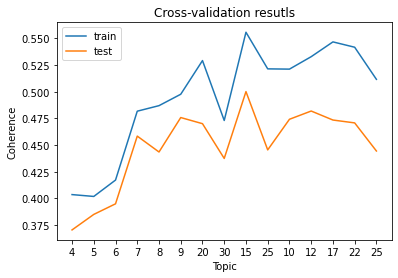

In [ ]:
x = [i for i in range(len(topics))]
topics = [str(t) for t in topics ]
plt.plot(x, train_data, label = 'train')
plt.plot(x, test_data, label = 'test')
plt.title('Cross-validation resutls')
plt.xlabel('Topic')
plt.ylabel('Coherence')
plt.xticks(ticks = x, labels = topics)
_= plt.legend()

# Visualization of topics

In [ ]:
topics = [r['N_topics'] for r in results]
topics_str = [str(r['N_topics']) for r in results]
lda_models = dict()
for name, t in zip(topics_str, topics):
  
  #define the strings
  name_model= '1_layer_model'+name+'.txt' 
  name_dictionary = '1_layer_model'+name+'.txt.id2word'

  #import what's needed
  temp_lda = LdaModel.load(name_model)
  temp_dict = gensim.corpora.Dictionary.load(name_dictionary)
  lda_models[name] = {
      "model": temp_lda,
      "dictionary": temp_dict,
      "import string": name_model
  }

In [ ]:
lda_models['5']['model'].print_topics()

[(0,
  '0.011*"countri" + 0.010*"state" + 0.008*"govern" + 0.007*"peopl" + 0.007*"nation" + 0.006*"secur" + 0.006*"unit" + 0.005*"forc" + 0.005*"war" + 0.005*"world"'),
 (1,
  '0.020*"peopl" + 0.012*"think" + 0.009*"go" + 0.009*"need" + 0.007*"presid" + 0.007*"know" + 0.007*"woman" + 0.006*"problem" + 0.006*"like" + 0.006*"want"'),
 (2,
  '0.011*"court" + 0.010*"law" + 0.008*"govern" + 0.007*"case" + 0.006*"offic" + 0.006*"public" + 0.006*"polic" + 0.006*"justic" + 0.005*"time" + 0.005*"state"'),
 (3,
  '0.008*"year" + 0.008*"new" + 0.007*"busi" + 0.007*"need" + 0.007*"work" + 0.006*"market" + 0.006*"compani" + 0.005*"develop" + 0.005*"provid" + 0.005*"servic"'),
 (4,
  '0.008*"like" + 0.006*"come" + 0.006*"day" + 0.006*"say" + 0.005*"new" + 0.005*"know" + 0.004*"shi" + 0.004*"year" + 0.004*"time" + 0.004*"week"')]

In [ ]:
lda_models['12']['model'].print_topics()

[(0,
  '0.038*"new" + 0.027*"citi" + 0.020*"question" + 0.017*"ask" + 0.014*"state" + 0.014*"counti" + 0.012*"bill" + 0.011*"meet" + 0.011*"council" + 0.010*"member"'),
 (1,
  '0.042*"think" + 0.033*"right" + 0.030*"peopl" + 0.017*"issu" + 0.016*"thing" + 0.011*"person" + 0.010*"way" + 0.009*"go" + 0.009*"human" + 0.009*"believ"'),
 (2,
  '0.020*"law" + 0.015*"case" + 0.015*"govern" + 0.011*"court" + 0.010*"offic" + 0.009*"polic" + 0.009*"public" + 0.009*"inform" + 0.008*"rule" + 0.008*"investig"'),
 (3,
  '0.013*"year" + 0.013*"busi" + 0.012*"money" + 0.012*"pay" + 0.011*"fund" + 0.010*"cost" + 0.009*"invest" + 0.009*"high" + 0.009*"million" + 0.008*"increas"'),
 (4,
  '0.024*"woman" + 0.022*"man" + 0.014*"peopl" + 0.010*"child" + 0.009*"famili" + 0.009*"young" + 0.009*"love" + 0.008*"life" + 0.007*"crime" + 0.007*"kill"'),
 (5,
  '0.013*"new" + 0.010*"product" + 0.009*"develop" + 0.008*"custom" + 0.007*"market" + 0.007*"work" + 0.007*"technolog" + 0.007*"look" + 0.007*"busi" + 0.006*

In [ ]:
#probably better number of topics = 7 ? 
!pip install pyLDAvis==2.1.2

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import pandas as pd

In [ ]:
# Visualize the topics
n_topics = '15'
dictionary_ = lda_models[n_topics]['dictionary']
lda_model_ = lda_models[n_topics]['model']

pyLDAvis.enable_notebook()
corpus = [dictionary_.doc2bow(doc) for doc in pol.stems.values]
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_, corpus, dictionary_)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.156535 -0.125511       1        1  15.198603
10    -0.011277 -0.203240       2        1   9.319195
1      0.069112 -0.059362       3        1   7.925747
13     0.135481  0.046126       4        1   7.088332
4     -0.100629  0.130283       5        1   6.586084
11    -0.135326  0.129157       6        1   6.393805
12     0.054147  0.047705       7        1   6.374446
9      0.141838  0.010320       8        1   6.036386
8     -0.070691 -0.180995       9        1   5.727108
0     -0.022626  0.205477      10        1   5.560909
6     -0.209577  0.020281      11        1   5.493408
7      0.217127 -0.005733      12        1   5.006796
14    -0.113305  0.018312      13        1   4.705420
3     -0.180007 -0.174337      14        1   4.339293
5      0.069198  0.141515      15        1   4.244467, topic_info=        Term          Freq         Total Category  logprob  loglift
265     need  27420.000000  27420.000000  Default  30.0000  30.0000
562    state  22431.000000  22431.000000  Default  29.0000  29.0000
1091  presid  13112.000000  13112.000000  Default  28.0000  28.0000
87     court  12236.000000  12236.000000  Default  27.0000  27.0000
1693  govern  20189.000000  20189.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
109      get   1207.418460  10747.287626  Topic15  -5.2663   0.9734
29     world   1150.324249  10540.157442  Topic15  -5.3148   0.9444
1907    fail    940.549749   2921.130189  Topic15  -5.5161   2.0263
598      use    973.893976   9725.908064  Topic15  -5.4813   0.8583
383    think    980.342522  24380.974683  Topic15  -5.4747  -0.0541

[963 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1763      5  0.999272    abort
1774      1  0.998140  acceler
775       1  0.295561   access
775       2  0.249802   access
775       3  0.453845   access
...     ...       ...      ...
2180      7  0.000328    young
2180     10  0.667227    young
2180     12  0.012800    young
4596      1  0.998552  zealand
4650     12  0.998807     zika

[2473 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 11, 2, 14, 5, 12, 13, 10, 9, 1, 7, 8, 15, 4, 6])

In [ ]:
refactor_data = [[np.array((pred))[:, 1].argmax(), np.array((pred))[:, 1].max(), np.array((pred))] for pred in lda_model_[corpus]]
refactor_data = np.array(refactor_data)
scores = refactor_data[:,2]
predictions = refactor_data[:, :2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
certainty = pd.DataFrame(predictions, columns = ['prediction', 'score'])
certainty.head()

,prediction,score
0,1,0.520388
1,0,0.418815
2,8,0.347293
3,8,0.266667
4,4,0.252947


In [ ]:
lda_model_.print_topics()

[(0,
  '0.029*"woman" + 0.025*"man" + 0.020*"pay" + 0.020*"peopl" + 0.019*"live" + 0.018*"million" + 0.014*"famili" + 0.012*"fight" + 0.011*"black" + 0.010*"love"'),
 (1,
  '0.060*"need" + 0.023*"peopl" + 0.020*"problem" + 0.019*"issu" + 0.017*"help" + 0.017*"care" + 0.016*"commun" + 0.015*"health" + 0.013*"work" + 0.011*"school"'),
 (2,
  '0.016*"busi" + 0.013*"new" + 0.013*"market" + 0.011*"develop" + 0.011*"compani" + 0.009*"product" + 0.009*"industri" + 0.008*"continu" + 0.008*"invest" + 0.007*"custom"'),
 (3,
  '0.039*"govern" + 0.030*"nation" + 0.019*"countri" + 0.017*"student" + 0.016*"minist" + 0.015*"india" + 0.014*"anti" + 0.013*"univers" + 0.008*"institut" + 0.007*"prime"'),
 (4,
  '0.020*"say" + 0.018*"question" + 0.016*"ask" + 0.015*"peopl" + 0.012*"know" + 0.012*"tell" + 0.011*"case" + 0.010*"person" + 0.009*"speak" + 0.009*"word"'),
 (5,
  '0.034*"money" + 0.025*"play" + 0.020*"big" + 0.016*"system" + 0.015*"game" + 0.012*"role" + 0.011*"player" + 0.010*"film" + 0.008*"t

In [ ]:
#distribution of scores
topics = pol.copy()
topics['prediction'] = certainty.prediction
topics['score_second'] = certainty.score

In [ ]:
topics.head(5)

,quoteId,lemmas,stems,geoNames,score,topic,spectrum,prediction,score_second
0,2016-01-15-001323,"['start', 'new', 'tradition', 'field', 'stream...","[start, new, tradit, field, stream, shop, pass...",[],0.765691,politics&biz&tech,"{'politics&biz&tech': 0.7656912803649902, 'spo...",1,0.520388
2,2016-01-15-001439,"['current', 'allegation', 'misrepresentation',...","[current, alleg, misrepresent, primari, goal, ...",[],0.955535,politics&biz&tech,"{'politics&biz&tech': 0.9555345000699162, 'spo...",8,0.347293
5,2016-01-15-001063,"['debate', 'troop', 'afghanistan', 'go', 'reop...","[debat, troop, afghanistan, go, reopen]","['US', 'Afghanistan']",0.759259,politics&biz&tech,"{'politics&biz&tech': 0.7592592481523752, 'spo...",4,0.413334
6,2016-01-15-001143,"['reemergence', 'afghanistan', 'issue']","[reemerg, afghanistan, issu]",['Afghanistan'],0.638896,politics&biz&tech,"{'politics&biz&tech': 0.6388958431780338, 'spo...",3,0.451295
7,2016-01-15-001107,"['james', 'madison', 'visit', 'professorship',...","[jame, madison, visit, professorship, amend, i...",[],0.650817,politics&biz&tech,"{'politics&biz&tech': 0.6508172042667866, 'spo...",1,0.721713


In [ ]:
len(topics[topics['score_second'] >0.02])/ len(topics)

0.4883734548201414

In [ ]:
for i, j in topics[topics['prediction'] == 2][['lemmas', 'score']].iterrows():
  print(j)

Streaming output truncated to the last 5000 lines.
score                                              0.478959
Name: 402, dtype: object
lemmas    ['appear', 'play', 'game', 'appointment', 'hon...
score                                              0.778015
Name: 418, dtype: object
lemmas    ['domestic', 'abuser', 'yep']
score                          0.638887
Name: 431, dtype: object
lemmas    ['think', 'london', 'key', 'stop', 'slaughter']
score                                            0.455958
Name: 452, dtype: object
lemmas    ['determined', 'truth', 'happen', 'park', 'nee...
score                                              0.770894
Name: 483, dtype: object
lemmas    ['era', 'affordable', 'care', 'act', 'strip', ...
score                                              0.787094
Name: 490, dtype: object
lemmas    ['use', 'torah', 'people', 'defense', 'torah',...
score                                              0.773473
Name: 531, dtype: object
lemmas    ['question', 'get', 'number'

KeyboardInterrupt: ignored

In [ ]:
# Visualize the topics
n_topics = '4'
dictionary_ = lda_models[n_topics]['dictionary']
lda_model_ = lda_models[n_topics]['model']

pyLDAvis.enable_notebook()
corpus = [dictionary_.doc2bow(doc) for doc in pol.stems.values]
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_, corpus, dictionary_)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.160045  0.077089       1        1  34.029517
0      0.058878 -0.156264       2        1  24.770137
1     -0.076387 -0.029457       3        1  22.079864
3      0.177553  0.108633       4        1  19.120482, topic_info=        Term          Freq         Total Category  logprob  loglift
87     court  12093.000000  12093.000000  Default  30.0000  30.0000
1081  market  11402.000000  11402.000000  Default  29.0000  29.0000
1091  presid  12761.000000  12761.000000  Default  28.0000  28.0000
764     care   7569.000000   7569.000000  Default  27.0000  27.0000
779      law  10779.000000  10779.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
5        new   4043.049422  22365.894124   Topic4  -5.5629  -0.0561
95    person   3221.686511   9174.249557   Topic4  -5.7900   0.6079
43      look   3358.676938  14381.565082   Topic4  -5.7484   0.2000
18      good   3396.633607  16763.844310   Topic4  -5.7372   0.0580
199     year   3532.595719  27954.113684   Topic4  -5.6979  -0.4141

[305 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2248      3  0.998864      addict
1864      1  0.998977  agricultur
1156      3  0.998103     alcohol
59        2  0.991281       amend
59        4  0.007914       amend
...     ...       ...         ...
199       1  0.553049        year
199       2  0.154289        year
199       3  0.166272        year
199       4  0.126386        year
4650      3  0.999231        zika

[526 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

In [ ]:
refactor_data = [[np.array((pred))[:, 1].argmax(), np.array((pred))[:, 1].max(), np.array((pred))] for pred in lda_model_[corpus]]
refactor_data = np.array(refactor_data)
scores = refactor_data[:,2]
predictions = refactor_data[:, :2]

#create a dataframe
certainty = pd.DataFrame(predictions, columns = ['prediction', 'score'])

lda_model_.print_topics()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


[(0,
  '0.010*"govern" + 0.009*"state" + 0.009*"court" + 0.008*"peopl" + 0.008*"presid" + 0.007*"countri" + 0.007*"law" + 0.007*"right" + 0.006*"nation" + 0.006*"polit"'),
 (1,
  '0.014*"peopl" + 0.011*"need" + 0.006*"problem" + 0.006*"care" + 0.006*"health" + 0.006*"work" + 0.005*"pay" + 0.005*"go" + 0.005*"money" + 0.005*"time"'),
 (2,
  '0.009*"new" + 0.008*"year" + 0.007*"busi" + 0.006*"market" + 0.006*"work" + 0.005*"compani" + 0.005*"develop" + 0.005*"need" + 0.005*"build" + 0.004*"continu"'),
 (3,
  '0.008*"think" + 0.008*"say" + 0.007*"like" + 0.007*"peopl" + 0.006*"go" + 0.006*"know" + 0.005*"come" + 0.005*"want" + 0.005*"trump" + 0.005*"vote"')]

In [ ]:
#distribution of scores
topics = pol.copy()
topics['prediction'] = certainty.prediction
topics['score_second'] = certainty.score
topics.head(5)

,quoteId,lemmas,stems,geoNames,score,topic,spectrum,prediction,score_second
0,2016-01-15-001323,"['start', 'new', 'tradition', 'field', 'stream...","[start, new, tradit, field, stream, shop, pass...",[],0.765691,politics&biz&tech,"{'politics&biz&tech': 0.7656912803649902, 'spo...",0,0.9998
2,2016-01-15-001439,"['current', 'allegation', 'misrepresentation',...","[current, alleg, misrepresent, primari, goal, ...",[],0.955535,politics&biz&tech,"{'politics&biz&tech': 0.9555345000699162, 'spo...",0,0.604254
5,2016-01-15-001063,"['debate', 'troop', 'afghanistan', 'go', 'reop...","[debat, troop, afghanistan, go, reopen]","['US', 'Afghanistan']",0.759259,politics&biz&tech,"{'politics&biz&tech': 0.7592592481523752, 'spo...",0,0.999251
6,2016-01-15-001143,"['reemergence', 'afghanistan', 'issue']","[reemerg, afghanistan, issu]",['Afghanistan'],0.638896,politics&biz&tech,"{'politics&biz&tech': 0.6388958431780338, 'spo...",2,0.629701
7,2016-01-15-001107,"['james', 'madison', 'visit', 'professorship',...","[jame, madison, visit, professorship, amend, i...",[],0.650817,politics&biz&tech,"{'politics&biz&tech': 0.6508172042667866, 'spo...",0,0.999667


In [ ]:
len(topics[topics['score_second'] > 0.5])/ len(topics)

0.46623295251591296

In [ ]:
for i, j in topics[topics['prediction'] == 0][['lemmas', 'score_second']].iterrows():
  print(j)

Streaming output truncated to the last 5000 lines.
score_second                                             0.560097
Name: 20835, dtype: object
lemmas          ['fear', 'discrimination', 'lgbt', 'person', '...
score_second                                             0.712417
Name: 20836, dtype: object
lemmas          ['encourage', 'discrimination', 'invite', 'lit...
score_second                                             0.828855
Name: 20837, dtype: object
lemmas          ['galloway', 'despicable', 'person', 'anti', '...
score_second                                             0.999727
Name: 20840, dtype: object
lemmas          ['ahhh', 'yer', 'muddah', 'wear', 'combat', 'b...
score_second                                             0.504371
Name: 20841, dtype: object
lemmas          ['distinction', 'difference', 'arkansas', 'leg...
score_second                                             0.999572
Name: 20842, dtype: object
lemmas          ['win', 'republican', 'nomination', 'beat', '

KeyboardInterrupt: ignored

In [ ]:
# Visualize the topics
n_topics = '7'
dictionary_ = lda_models[n_topics]['dictionary']
lda_model_ = lda_models[n_topics]['model']

pyLDAvis.enable_notebook()
corpus = [dictionary_.doc2bow(doc) for doc in pol.stems.values]
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_, corpus, dictionary_)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.151506  0.049516       1        1  19.094527
5      0.033591  0.142230       2        1  17.028645
6     -0.211132  0.098614       3        1  16.396369
4      0.142924 -0.002629       4        1  14.351231
2      0.109504  0.037114       5        1  13.826216
0     -0.086260 -0.292074       6        1  10.262733
1      0.162877 -0.032771       7        1   9.040279, topic_info=         Term          Freq         Total Category  logprob  loglift
1693   govern  20034.000000  20034.000000  Default  30.0000  30.0000
1091   presid  12694.000000  12694.000000  Default  29.0000  29.0000
5         new  22365.000000  22365.000000  Default  28.0000  28.0000
87      court  12400.000000  12400.000000  Default  27.0000  27.0000
562     state  22498.000000  22498.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
48       like   2547.912708  21204.624409   Topic7  -5.2756   0.2845
201      find   1905.415906   9560.004990   Topic7  -5.5662   0.7906
915    famili   1801.599721   6553.408771   Topic7  -5.6222   1.1122
409   problem   1731.420099   8696.124571   Topic7  -5.6619   0.7895
265      need   1731.861640  27521.494513   Topic7  -5.6617  -0.3623

[544 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
205        2  0.623435     act
205        4  0.106190     act
205        5  0.210286     act
205        7  0.059946     act
276        1  0.041495  action
...      ...       ...     ...
199        6  0.159807    year
199        7  0.005582    year
1767       6  0.999362    york
12655      2  0.997341     ypg
4650       7  0.998975    zika

[1232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 7, 5, 3, 1, 2])

In [ ]:
refactor_data = [[np.array((pred))[:, 1].argmax(), np.array((pred))[:, 1].max(), np.array((pred))] for pred in lda_model_[corpus]]
refactor_data = np.array(refactor_data)
scores = refactor_data[:,2]
predictions = refactor_data[:, :2]

#create a dataframe
certainty = pd.DataFrame(predictions, columns = ['prediction', 'score'])

lda_model_.print_topics()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


[(0,
  '0.012*"new" + 0.011*"citi" + 0.008*"year" + 0.008*"come" + 0.007*"water" + 0.007*"day" + 0.006*"south" + 0.006*"like" + 0.006*"week" + 0.006*"go"'),
 (1,
  '0.012*"woman" + 0.009*"child" + 0.009*"peopl" + 0.009*"health" + 0.008*"man" + 0.008*"care" + 0.007*"life" + 0.006*"drug" + 0.006*"know" + 0.006*"patient"'),
 (2,
  '0.010*"case" + 0.007*"time" + 0.007*"inform" + 0.006*"question" + 0.006*"ask" + 0.006*"think" + 0.006*"court" + 0.006*"issu" + 0.006*"decis" + 0.006*"public"'),
 (3,
  '0.012*"year" + 0.009*"need" + 0.007*"market" + 0.007*"pay" + 0.007*"money" + 0.007*"go" + 0.006*"increas" + 0.006*"high" + 0.006*"cost" + 0.006*"fund"'),
 (4,
  '0.014*"peopl" + 0.014*"presid" + 0.012*"think" + 0.010*"say" + 0.010*"court" + 0.009*"vote" + 0.009*"polit" + 0.008*"go" + 0.008*"elect" + 0.008*"justic"'),
 (5,
  '0.018*"govern" + 0.014*"state" + 0.010*"law" + 0.009*"peopl" + 0.008*"countri" + 0.008*"need" + 0.008*"right" + 0.007*"nation" + 0.007*"secur" + 0.007*"issu"'),
 (6,
  '0.01

In [ ]:
#distribution of scores
topics = pol.copy()
topics['prediction'] = certainty.prediction
topics['score_second'] = certainty.score
topics.head(5)

,quoteId,lemmas,stems,geoNames,score,topic,spectrum,prediction,score_second
0,2016-01-15-001323,"['start', 'new', 'tradition', 'field', 'stream...","[start, new, tradit, field, stream, shop, pass...",[],0.765691,politics&biz&tech,"{'politics&biz&tech': 0.7656912803649902, 'spo...",1,0.572236
2,2016-01-15-001439,"['current', 'allegation', 'misrepresentation',...","[current, alleg, misrepresent, primari, goal, ...",[],0.955535,politics&biz&tech,"{'politics&biz&tech': 0.9555345000699162, 'spo...",1,0.436065
5,2016-01-15-001063,"['debate', 'troop', 'afghanistan', 'go', 'reop...","[debat, troop, afghanistan, go, reopen]","['US', 'Afghanistan']",0.759259,politics&biz&tech,"{'politics&biz&tech': 0.7592592481523752, 'spo...",1,0.748964
6,2016-01-15-001143,"['reemergence', 'afghanistan', 'issue']","[reemerg, afghanistan, issu]",['Afghanistan'],0.638896,politics&biz&tech,"{'politics&biz&tech': 0.6388958431780338, 'spo...",1,0.464494
7,2016-01-15-001107,"['james', 'madison', 'visit', 'professorship',...","[jame, madison, visit, professorship, amend, i...",[],0.650817,politics&biz&tech,"{'politics&biz&tech': 0.6508172042667866, 'spo...",1,0.574175


In [ ]:
len(topics[topics['score_second'] > 0.5])/ len(topics)

0.3971900319917864

In [ ]:
topics['score_second'].isna().sum()['score_second']

In [ ]:
# Visualize the topics
n_topics = '9'
dictionary_ = lda_models[n_topics]['dictionary']
lda_model_ = lda_models[n_topics]['model']

pyLDAvis.enable_notebook()
corpus = [dictionary_.doc2bow(doc) for doc in pol.stems.values]
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_, corpus, dictionary_)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.042011 -0.185374       1        1  17.774107
6      0.122586  0.126184       2        1  13.262230
7      0.115802 -0.049479       3        1  12.415919
1      0.129590  0.138341       4        1  11.755017
4      0.044361  0.186935       5        1  11.716553
8      0.032708 -0.157664       6        1  10.264484
0      0.022512 -0.116738       7        1   9.682089
5     -0.162380 -0.001734       8        1   9.257468
2     -0.347190  0.059529       9        1   3.872133, topic_info=        Term          Freq         Total Category  logprob  loglift
5        new  22444.000000  22444.000000  Default  30.0000  30.0000
159     busi  14460.000000  14460.000000  Default  29.0000  29.0000
87     court  12094.000000  12094.000000  Default  28.0000  28.0000
265     need  27851.000000  27851.000000  Default  27.0000  27.0000
1091  presid  12875.000000  12875.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
211     come    718.199792  17365.375832   Topic9  -5.6940   0.0659
1532   class    567.009058   2175.190040   Topic9  -5.9304   1.9069
1160    home    587.957262   5117.136528   Topic9  -5.8941   1.0877
263     larg    587.907485   6551.411496   Topic9  -5.8942   0.8405
48      like    600.705359  21278.386681   Topic9  -5.8726  -0.3160

[654 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
1501       3  0.183670      abus
1501       4  0.815837      abus
325        1  0.997452  acquisit
205        1  0.014959       act
205        2  0.321329       act
...      ...       ...       ...
199        8  0.191106      year
199        9  0.008271      year
5597       6  0.998336     yield
1767       8  0.999653      york
12655      5  0.996985       ypg

[1592 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 8, 2, 5, 9, 1, 6, 3])

In [ ]:
refactor_data = [[np.array((pred))[:, 1].argmax(), np.array((pred))[:, 1].max(), np.array((pred))] for pred in lda_model_[corpus]]
refactor_data = np.array(refactor_data)
scores = refactor_data[:,2]
predictions = refactor_data[:, :2]

#create a dataframe
certainty = pd.DataFrame(predictions, columns = ['prediction', 'score'])

lda_model_.print_topics()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


[(0,
  '0.015*"pay" + 0.014*"money" + 0.014*"year" + 0.012*"state" + 0.011*"million" + 0.011*"govern" + 0.011*"fund" + 0.009*"go" + 0.009*"cost" + 0.008*"tax"'),
 (1,
  '0.012*"law" + 0.011*"peopl" + 0.010*"polic" + 0.008*"case" + 0.007*"offic" + 0.007*"right" + 0.007*"person" + 0.006*"think" + 0.006*"investig" + 0.005*"inform"'),
 (2,
  '0.011*"food" + 0.007*"east" + 0.007*"middl" + 0.007*"eat" + 0.006*"west" + 0.006*"peopl" + 0.005*"area" + 0.005*"femal" + 0.005*"israel" + 0.005*"percent"'),
 (3,
  '0.015*"busi" + 0.012*"new" + 0.009*"develop" + 0.009*"compani" + 0.007*"work" + 0.007*"continu" + 0.007*"build" + 0.007*"product" + 0.006*"industri" + 0.006*"provid"'),
 (4,
  '0.016*"think" + 0.015*"peopl" + 0.014*"presid" + 0.012*"vote" + 0.012*"go" + 0.011*"say" + 0.010*"polit" + 0.009*"like" + 0.009*"know" + 0.009*"elect"'),
 (5,
  '0.022*"new" + 0.010*"year" + 0.010*"day" + 0.007*"time" + 0.007*"come" + 0.007*"week" + 0.006*"like" + 0.005*"month" + 0.004*"film" + 0.004*"hour"'),
 (6,

In [ ]:
#distribution of scores
topics = pol.copy()
topics['prediction'] = certainty.prediction
topics['score_second'] = certainty.score
topics.head(5)

,quoteId,lemmas,stems,geoNames,score,topic,spectrum,prediction,score_second
0,2016-01-15-001323,"['start', 'new', 'tradition', 'field', 'stream...","[start, new, tradit, field, stream, shop, pass...",[],0.765691,politics&biz&tech,"{'politics&biz&tech': 0.7656912803649902, 'spo...",0,0.67361
2,2016-01-15-001439,"['current', 'allegation', 'misrepresentation',...","[current, alleg, misrepresent, primari, goal, ...",[],0.955535,politics&biz&tech,"{'politics&biz&tech': 0.9555345000699162, 'spo...",1,0.708732
5,2016-01-15-001063,"['debate', 'troop', 'afghanistan', 'go', 'reop...","[debat, troop, afghanistan, go, reopen]","['US', 'Afghanistan']",0.759259,politics&biz&tech,"{'politics&biz&tech': 0.7592592481523752, 'spo...",0,0.379499
6,2016-01-15-001143,"['reemergence', 'afghanistan', 'issue']","[reemerg, afghanistan, issu]",['Afghanistan'],0.638896,politics&biz&tech,"{'politics&biz&tech': 0.6388958431780338, 'spo...",1,0.800286
7,2016-01-15-001107,"['james', 'madison', 'visit', 'professorship',...","[jame, madison, visit, professorship, amend, i...",[],0.650817,politics&biz&tech,"{'politics&biz&tech': 0.6508172042667866, 'spo...",0,0.999112


In [ ]:
len(topics[topics['score_second'] > 0.5])/ len(topics)

0.36979303910259037

In [ ]:
print(pd.unique(topics['prediction']))
for i in range(0, 9):
  print(i, topics[topics['prediction'] == i]['score_second'].mean())

[0 1 2 5 3 4 7 6 8 nan]
0 0.7695544260344832
1 0.617742068785014
2 0.5151475855241545
3 0.44748252749819656
4 0.39949530922669046
5 0.3719020148440433
6 0.31810606519381207
7 0.2948593729072147
8 0.2782013863325119


In [ ]:
# Visualize the topics
n_topics = '30'
dictionary_ = lda_models[n_topics]['dictionary']
lda_model_ = lda_models[n_topics]['model']

pyLDAvis.enable_notebook()
corpus = [dictionary_.doc2bow(doc) for doc in pol.stems.values]
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_, corpus, dictionary_)
LDAvis_prepared

In [ ]:
refactor_data = [[np.array((pred))[:, 1].argmax(), np.array((pred))[:, 1].max(), np.array((pred))] for pred in lda_model_[corpus]]
refactor_data = np.array(refactor_data)
scores = refactor_data[:,2]
predictions = refactor_data[:, :2]

#create a dataframe
certainty = pd.DataFrame(predictions, columns = ['prediction', 'score'])

lda_model_.print_topics()

In [ ]:
#distribution of scores
topics = pol.copy()
topics['prediction'] = certainty.prediction
topics['score_second'] = certainty.score
topics.head(5)

In [ ]:
len(topics[topics['score_second'] > 0.5])/ len(topics)

In [ ]:
topics['score_second'].isna().sum()['score_second']

In [ ]:
topics_30 = topics

In [ ]:
# Visualize the topics
n_topics = '12'
dictionary_ = lda_models[n_topics]['dictionary']
lda_model_ = lda_models[n_topics]['model']

pyLDAvis.enable_notebook()
corpus = [dictionary_.doc2bow(doc) for doc in pol.stems.values]
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_, corpus, dictionary_)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.151506  0.049516       1        1  19.094527
5      0.033591  0.142230       2        1  17.028645
6     -0.211132  0.098614       3        1  16.396369
4      0.142924 -0.002629       4        1  14.351231
2      0.109504  0.037114       5        1  13.826216
0     -0.086260 -0.292074       6        1  10.262733
1      0.162877 -0.032771       7        1   9.040279, topic_info=         Term          Freq         Total Category  logprob  loglift
1693   govern  20034.000000  20034.000000  Default  30.0000  30.0000
1091   presid  12694.000000  12694.000000  Default  29.0000  29.0000
5         new  22365.000000  22365.000000  Default  28.0000  28.0000
87      court  12400.000000  12400.000000  Default  27.0000  27.0000
562     state  22498.000000  22498.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
48       like   2547.912708  21204.624409   Topic7  -5.2756   0.2845
201      find   1905.415906   9560.004990   Topic7  -5.5662   0.7906
915    famili   1801.599721   6553.408771   Topic7  -5.6222   1.1122
409   problem   1731.420099   8696.124571   Topic7  -5.6619   0.7895
265      need   1731.861640  27521.494513   Topic7  -5.6617  -0.3623

[544 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
205        2  0.623435     act
205        4  0.106190     act
205        5  0.210286     act
205        7  0.059946     act
276        1  0.041495  action
...      ...       ...     ...
199        6  0.159807    year
199        7  0.005582    year
1767       6  0.999362    york
12655      2  0.997341     ypg
4650       7  0.998975    zika

[1232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 7, 5, 3, 1, 2])

In [ ]:
refactor_data = [[np.array((pred))[:, 1].argmax(), np.array((pred))[:, 1].max(), np.array((pred))] for pred in lda_model_[corpus]]
refactor_data = np.array(refactor_data)
scores = refactor_data[:,2]
predictions = refactor_data[:, :2]

#create a dataframe
certainty = pd.DataFrame(predictions, columns = ['prediction', 'score'])

lda_model_.print_topics()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


[(0,
  '0.012*"new" + 0.011*"citi" + 0.008*"year" + 0.008*"come" + 0.007*"water" + 0.007*"day" + 0.006*"south" + 0.006*"like" + 0.006*"week" + 0.006*"go"'),
 (1,
  '0.012*"woman" + 0.009*"child" + 0.009*"peopl" + 0.009*"health" + 0.008*"man" + 0.008*"care" + 0.007*"life" + 0.006*"drug" + 0.006*"know" + 0.006*"patient"'),
 (2,
  '0.010*"case" + 0.007*"time" + 0.007*"inform" + 0.006*"question" + 0.006*"ask" + 0.006*"think" + 0.006*"court" + 0.006*"issu" + 0.006*"decis" + 0.006*"public"'),
 (3,
  '0.012*"year" + 0.009*"need" + 0.007*"market" + 0.007*"pay" + 0.007*"money" + 0.007*"go" + 0.006*"increas" + 0.006*"high" + 0.006*"cost" + 0.006*"fund"'),
 (4,
  '0.014*"peopl" + 0.014*"presid" + 0.012*"think" + 0.010*"say" + 0.010*"court" + 0.009*"vote" + 0.009*"polit" + 0.008*"go" + 0.008*"elect" + 0.008*"justic"'),
 (5,
  '0.018*"govern" + 0.014*"state" + 0.010*"law" + 0.009*"peopl" + 0.008*"countri" + 0.008*"need" + 0.008*"right" + 0.007*"nation" + 0.007*"secur" + 0.007*"issu"'),
 (6,
  '0.01

In [ ]:
#distribution of scores
topics = pol.copy()
topics['prediction'] = certainty.prediction
topics['score_second'] = certainty.score
topics.head(5)

,quoteId,lemmas,stems,geoNames,score,topic,spectrum,prediction,score_second
0,2016-01-15-001323,"['start', 'new', 'tradition', 'field', 'stream...","[start, new, tradit, field, stream, shop, pass...",[],0.765691,politics&biz&tech,"{'politics&biz&tech': 0.7656912803649902, 'spo...",1,0.572236
2,2016-01-15-001439,"['current', 'allegation', 'misrepresentation',...","[current, alleg, misrepresent, primari, goal, ...",[],0.955535,politics&biz&tech,"{'politics&biz&tech': 0.9555345000699162, 'spo...",1,0.436065
5,2016-01-15-001063,"['debate', 'troop', 'afghanistan', 'go', 'reop...","[debat, troop, afghanistan, go, reopen]","['US', 'Afghanistan']",0.759259,politics&biz&tech,"{'politics&biz&tech': 0.7592592481523752, 'spo...",1,0.748964
6,2016-01-15-001143,"['reemergence', 'afghanistan', 'issue']","[reemerg, afghanistan, issu]",['Afghanistan'],0.638896,politics&biz&tech,"{'politics&biz&tech': 0.6388958431780338, 'spo...",1,0.464494
7,2016-01-15-001107,"['james', 'madison', 'visit', 'professorship',...","[jame, madison, visit, professorship, amend, i...",[],0.650817,politics&biz&tech,"{'politics&biz&tech': 0.6508172042667866, 'spo...",1,0.574175


In [ ]:
len(topics[topics['score_second'] > 0.5])/ len(topics)

0.3971900319917864

In [ ]:
topics['score_second'].isna().sum()['score_second']

262116

# Deploying the model with 10 topics

In [ ]:
lda_submodel_ = lda_models['10']['model']

In [ ]:
lda_submodel_.print_topics()

[(0,
  '0.044*"new" + 0.029*"state" + 0.014*"south" + 0.014*"univers" + 0.012*"student" + 0.011*"shi" + 0.010*"believ" + 0.010*"school" + 0.008*"play" + 0.007*"chang"'),
 (1,
  '0.012*"busi" + 0.012*"new" + 0.009*"world" + 0.009*"compani" + 0.009*"product" + 0.008*"custom" + 0.008*"technolog" + 0.007*"experi" + 0.007*"team" + 0.007*"industri"'),
 (2,
  '0.013*"need" + 0.009*"continu" + 0.009*"market" + 0.008*"work" + 0.008*"develop" + 0.008*"term" + 0.008*"servic" + 0.008*"provid" + 0.008*"invest" + 0.007*"improv"'),
 (3,
  '0.017*"state" + 0.016*"countri" + 0.016*"govern" + 0.014*"unit" + 0.012*"nation" + 0.010*"forc" + 0.009*"secur" + 0.008*"peopl" + 0.008*"war" + 0.007*"minist"'),
 (4,
  '0.018*"think" + 0.016*"peopl" + 0.015*"presid" + 0.012*"polit" + 0.011*"court" + 0.010*"vote" + 0.010*"elect" + 0.010*"say" + 0.010*"parti" + 0.009*"right"'),
 (5,
  '0.018*"law" + 0.013*"public" + 0.013*"case" + 0.011*"offic" + 0.011*"polic" + 0.010*"inform" + 0.008*"govern" + 0.008*"court" + 0.00

In [ ]:
corpus = [lda_models['10']['dictionary'].doc2bow(doc) for doc in pol.stems.values]

refactor_data = [[np.array((pred))[:, 1].argmax(), np.array((pred))[:, 1].max(), np.array((pred))] for pred in lda_submodel_[corpus]]
refactor_data = np.array(refactor_data)
scores = refactor_data[:,2]
predictions = refactor_data[:, :2]

#create a dataframe
certainty = pd.DataFrame(predictions, columns = ['prediction', 'score'])

lda_submodel_.print_topics()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


[(0,
  '0.044*"new" + 0.029*"state" + 0.014*"south" + 0.014*"univers" + 0.012*"student" + 0.011*"shi" + 0.010*"believ" + 0.010*"school" + 0.008*"play" + 0.007*"chang"'),
 (1,
  '0.012*"busi" + 0.012*"new" + 0.009*"world" + 0.009*"compani" + 0.009*"product" + 0.008*"custom" + 0.008*"technolog" + 0.007*"experi" + 0.007*"team" + 0.007*"industri"'),
 (2,
  '0.013*"need" + 0.009*"continu" + 0.009*"market" + 0.008*"work" + 0.008*"develop" + 0.008*"term" + 0.008*"servic" + 0.008*"provid" + 0.008*"invest" + 0.007*"improv"'),
 (3,
  '0.017*"state" + 0.016*"countri" + 0.016*"govern" + 0.014*"unit" + 0.012*"nation" + 0.010*"forc" + 0.009*"secur" + 0.008*"peopl" + 0.008*"war" + 0.007*"minist"'),
 (4,
  '0.018*"think" + 0.016*"peopl" + 0.015*"presid" + 0.012*"polit" + 0.011*"court" + 0.010*"vote" + 0.010*"elect" + 0.010*"say" + 0.010*"parti" + 0.009*"right"'),
 (5,
  '0.018*"law" + 0.013*"public" + 0.013*"case" + 0.011*"offic" + 0.011*"polic" + 0.010*"inform" + 0.008*"govern" + 0.008*"court" + 0.00

In [ ]:
topics = pol.copy()
topics['prediction'] = certainty.prediction
topics['score_second'] = certainty.score

In [ ]:
topics['new_prediction'] = 0

In [ ]:
len(pol), len(topics)

(461085, 461085)

In [ ]:
# 0 -->students               '0.044*"new" + 0.029*"state" + 0.014*"south" + 0.014*"univers" + 0.012*"student" + 0.011*"shi" + 0.010*"believ" + 0.010*"school" + 0.008*"play" + 0.007*"chang"'),
 
# 1 --> businness and tech    '0.012*"busi" + 0.012*"new" + 0.009*"world" + 0.009*"compani" + 0.009*"product" + 0.008*"custom" + 0.008*"technolog" + 0.007*"experi" + 0.007*"team" + 0.007*"industri"'),
 
# 2 --> economy and market    '0.013*"need" + 0.009*"continu" + 0.009*"market" + 0.008*"work" + 0.008*"develop" + 0.008*"term" + 0.008*"servic" + 0.008*"provid" + 0.008*"invest" + 0.007*"improv"'),
 
# 3 --> war, violence         '0.017*"state" + 0.016*"countri" + 0.016*"govern" + 0.014*"unit" + 0.012*"nation" + 0.010*"forc" + 0.009*"secur" + 0.008*"peopl" + 0.008*"war" + 0.007*"minist"'),
 
# 4 --> politics, elections   '0.018*"think" + 0.016*"peopl" + 0.015*"presid" + 0.012*"polit" + 0.011*"court" + 0.010*"vote" + 0.010*"elect" + 0.010*"say" + 0.010*"parti" + 0.009*"right"'),

# 5 --> law, trials           '0.018*"law" + 0.013*"public" + 0.013*"case" + 0.011*"offic" + 0.011*"polic" + 0.010*"inform" + 0.008*"govern" + 0.008*"court" + 0.007*"investig" + 0.007*"legal"'),
 
# 6 -->                       '0.030*"year" + 0.020*"day" + 0.015*"time" + 0.013*"month" + 0.011*"week" + 0.010*"meet" + 0.008*"come" + 0.007*"take" + 0.006*"earli" + 0.006*"ago"'),
 
# 7 --> money, job            '0.021*"peopl" + 0.017*"pay" + 0.016*"money" + 0.014*"million" + 0.014*"go" + 0.013*"year" + 0.010*"percent" + 0.009*"tax" + 0.009*"spend" + 0.009*"job"'),
 
# 8 --> social issues         '0.017*"peopl" + 0.015*"problem" + 0.011*"woman" + 0.011*"need" + 0.010*"care" + 0.009*"life" + 0.009*"health" + 0.009*"child" + 0.008*"know" + 0.008*"find"'),
 
# 9 --> environments          '0.013*"citi" + 0.013*"water" + 0.012*"area" + 0.011*"like" + 0.009*"build" + 0.008*"road" + 0.005*"come" + 0.005*"land" + 0.005*"park" + 0.005*"street"')]

In [ ]:
 topic_names = [
  '?',    
   'businness and tech',    
   'economy and market'    ,
   'war, violence     ',     
   'politics, elections' ,  
   'legislation&law' ,          
    '?           ',               
   'social issues'     ,       
   'social issues',         
 'environments     ']

# Example prediction

In [ ]:
import numpy as np
i = np.random.randint(0, len(topics))
print(i)
print(topics.iloc[i].lemmas)
print(topics.iloc[i].score)
for i in lda_submodel_[corpus[i]]:
  print(topic_names[i[0]],'\t', round(i[1], 2), '\n')

365658
['consequential', 'judge', 'thinker', 'serve', 'supreme', 'court']
0.9364997521042824
? 	 0.01 

businness and tech 	 0.01 

economy and market 	 0.01 

war, violence      	 0.01 

politics, elections 	 0.87 

legislation&law 	 0.01 

?            	 0.01 

social issues 	 0.01 

social issues 	 0.01 

environments      	 0.01 

